In [35]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '../../'))

In [38]:
import importlib
importlib.reload(sys.modules['scripts.data_description'])

<module 'scripts.data_description' from '/home/kaleb/projects/kaim/KAIM-Week1/notebooks/eda/../../scripts/data_description.py'>

In [39]:
from scripts.data_loading import load_dataset
from scripts.data_description import *

In [40]:
data = load_dataset('../../data/raw_analyst_ratings.csv')


In [41]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [42]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Descriptive Statistics

In [43]:
df, headline_stats, headline_length_column = calculate_and_describe_column_length(data, 'headline')

In [44]:
headline_stats


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [45]:
df.head()

,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [46]:
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


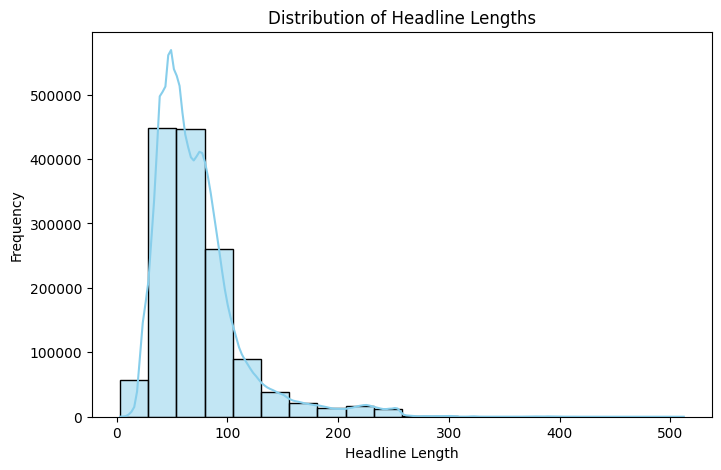

In [47]:
plot_distribution(
    df, 
    headline_length_column, 
    title="Distribution of Headline Lengths", 
    xlabel="Headline Length", 
    ylabel="Frequency", 
    color='skyblue'
)

### Publisher Analysis


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


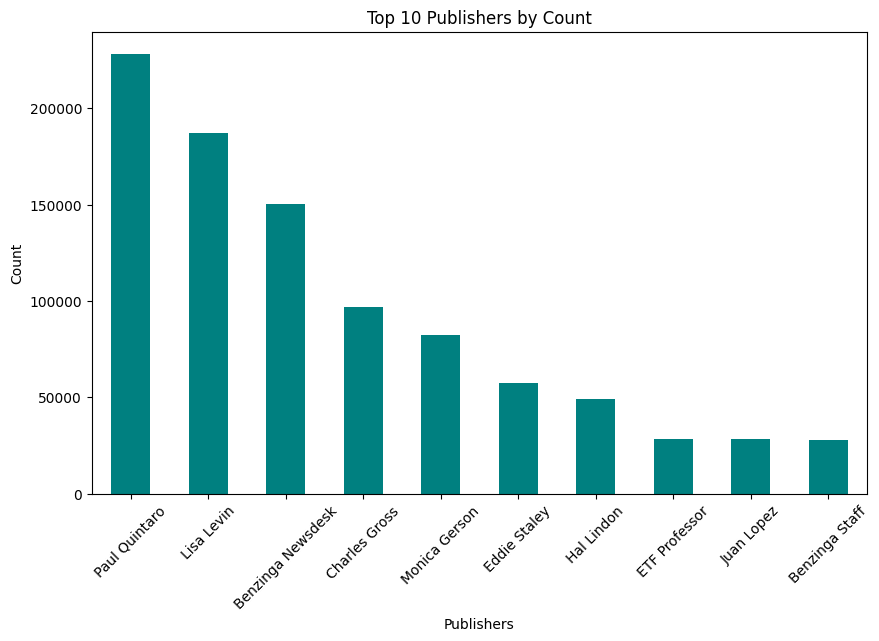

In [48]:
publisher_counts = count_values(df, 'publisher')
print("\nTop Publishers:")
print(publisher_counts.head(10))
plot_top_values(publisher_counts, column_name='Publishers')

/tmp/ipykernel_13421/710755721.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df[date_column].dt.to_period('M')


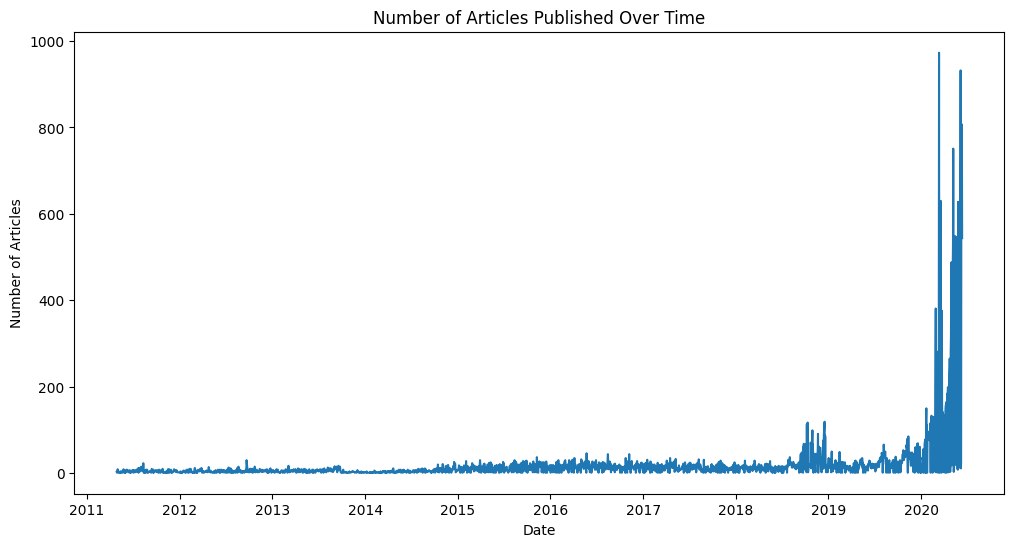

In [49]:
def extract_date_features(df, date_column):
    """
    Extract and analyze date-related features from the dataset.
    """
    df[date_column] = pd.to_datetime(df[date_column], utc=True, errors='coerce')
    df['day'] = df[date_column].dt.date
    df['month'] = df[date_column].dt.to_period('M')
    df['day_of_week'] = df[date_column].dt.day_name()
    return df
df = extract_date_features(df, 'date')

plot_time_series(
    df, 
    'day', 
    title="Number of Articles Published Over Time", 
    xlabel="Date", 
    ylabel="Number of Articles"
)

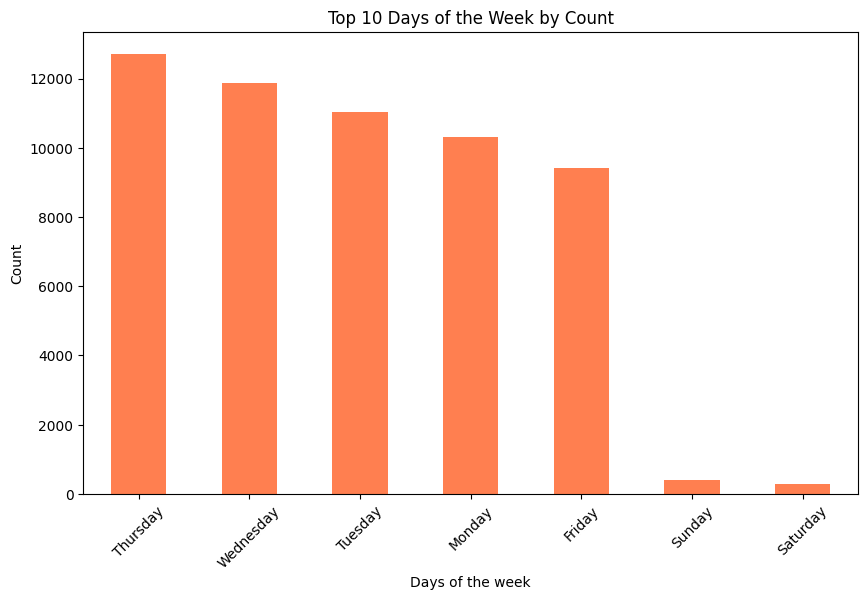

In [50]:
plot_top_values(
    count_values(df, 'day_of_week'), 
    column_name="Days of the Week", 
    color='coral'
)

# Sentiment Analysis and Topic Modeling

In [ ]:
perform_topic_modeling(df, 'headline')

# Perform time series analysis
analyze_publication_frequency(df, 'date')
analyze_publication_times(df, 'date')

# Analyze publishers
analyze_publishers(df, 'publisher')

# Perform correlation analysis
analyze_sentiment_correlation(df, 'datasets/stock_prices.csv')